In [43]:
import pandas as pd

ukf_data = pd.read_csv('CarND-Unscented-Kalman-Filter-Project/results/ukf_results_0.csv')
ekf_data = pd.read_csv('CarND-Unscented-Kalman-Filter-Project/results/ekf_results_0.csv')

In [6]:
ukf_data.head()

rmse_px   rmse_py   rmse_vx   rmse_vy   rmse_ya   rmse_yr  nis_radar  \
0  0.287757  0.019660  0.199937  0.000000  0.000000  0.006911    0.00000   
1  0.221721  0.073611  0.192010  0.417529  0.082863  0.006304    3.15995   
2  0.189183  0.067159  0.182530  0.458990  0.090959  0.009687    3.15995   
3  0.177153  0.069692  0.197391  0.438655  0.087182  0.022508    2.15848   
4  0.165794  0.064621  0.198210  0.418933  0.083338  0.029406    2.15848   

   nis_lidar      px_t      py_t     vx_t      vy_t      ya_t      yr_t  \
0    0.00000  0.600000  0.600000  5.19994  0.000000  0.000000  0.006911   
1    0.00000  0.859997  0.600045  5.19975  0.001797  0.000346  0.013822   
2    1.38549  1.119980  0.600225  5.19943  0.005390  0.001037  0.020730   
3    1.38549  1.379960  0.600629  5.19898  0.010778  0.002073  0.027634   
4    1.06512  1.639900  0.601347  5.19839  0.017960  0.003455  0.034535   

       px_e      py_e     vx_e      vy_e      ya_e      yr_e  
0  0.312243  0.580340  5.00000  0.000000  0.000000  0.000000  
1  0.735435  0.497817  5.01601  0.592272  0.117532  0.008190  
2  1.024850  0.548324  5.03752  0.537700  0.106336  0.006517  
3  1.245190  0.523837  4.96254  0.381801  0.076785 -0.014138  
4  1.530790  0.563244  4.99694  0.346366  0.069205 -0.013395

<Figure size 432x288 with 0 Axes>

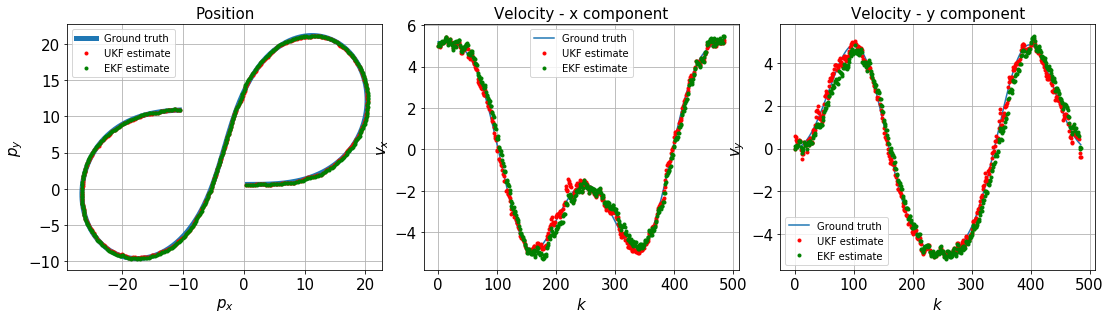

<Figure size 432x288 with 0 Axes>

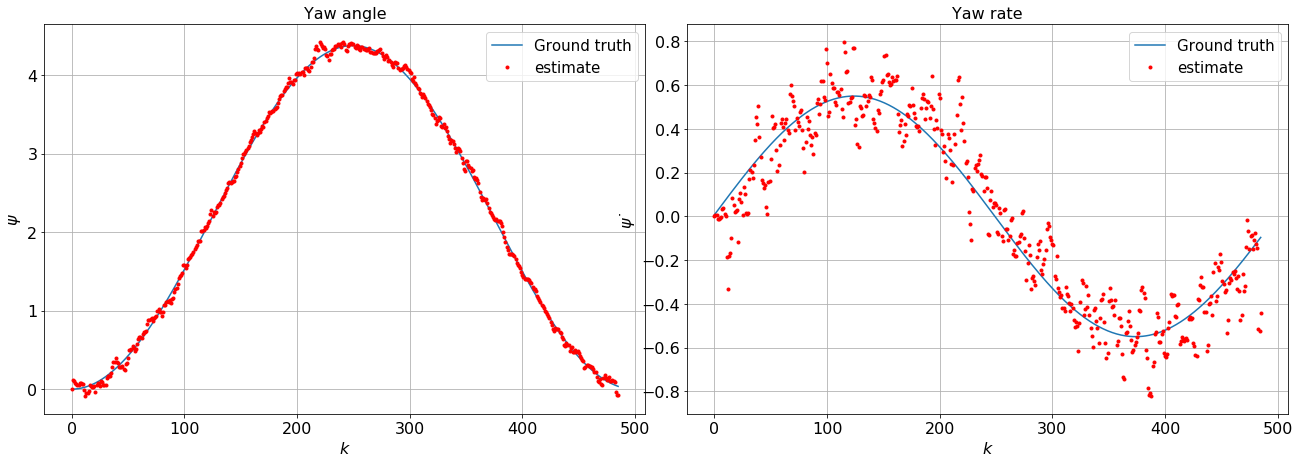

<Figure size 432x288 with 0 Axes>

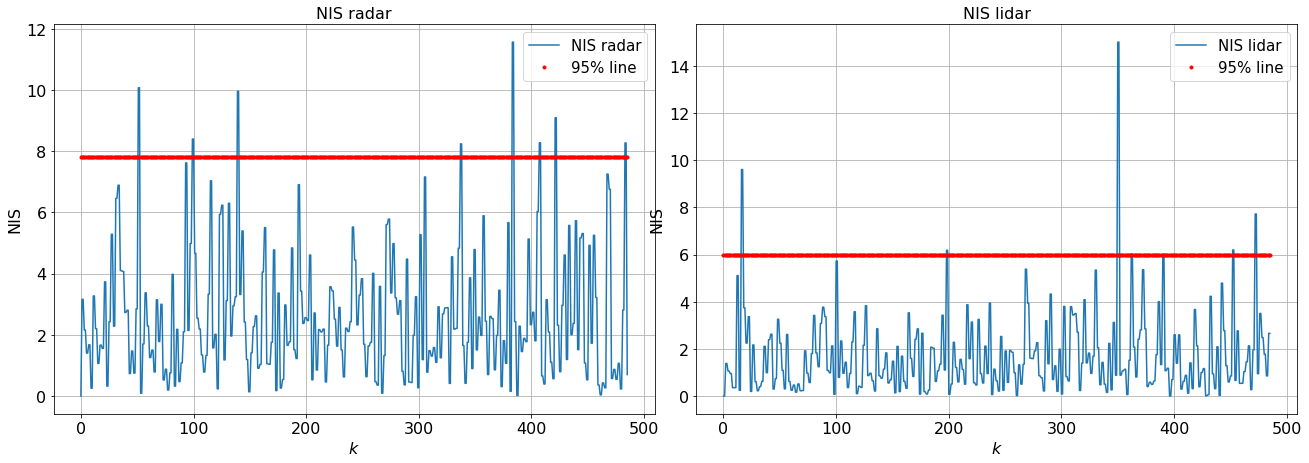

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure()
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
f.tight_layout()
fsize = 15

ax1.plot(ukf_data.px_t, ukf_data.py_t, linewidth = 5, label = 'Ground truth')
ax1.plot(ukf_data.px_e, ukf_data.py_e, 'r.', label = 'UKF estimate')
ax1.plot(ekf_data.px_e, ekf_data.py_e, 'g.', label = 'EKF estimate')
ax1.set_title('Position', fontsize = fsize)
ax1.set_ylabel('$p_{y}$', fontsize = fsize)
ax1.set_xlabel('$p_{x}$', fontsize = fsize)
ax1.tick_params(labelsize = fsize)
ax1.grid()
ax1.legend(fontsize = 10)

ax2.plot(ukf_data.vx_t, label = 'Ground truth')
ax2.plot(ukf_data.vx_e, 'r.', label = 'UKF estimate')
ax2.plot(ekf_data.vx_e, 'g.', label = 'EKF estimate')
ax2.set_title('Velocity - x component', fontsize = fsize)
ax2.set_ylabel('$v_{x}$', fontsize = fsize)
ax2.set_xlabel('$k$', fontsize = fsize)
ax2.tick_params(labelsize = fsize)
ax2.grid()
ax2.legend(fontsize = 10)

ax3.plot(ukf_data.vy_t, label = 'Ground truth')
ax3.plot(ukf_data.vy_e, 'r.', label = 'UKF estimate')
ax3.plot(ekf_data.vy_e, 'g.', label = 'EKF estimate')
ax3.set_title('Velocity - y component', fontsize = fsize)
ax3.set_ylabel('$v_{y}$', fontsize = fsize)
ax3.set_xlabel('$k$', fontsize = fsize)
ax3.tick_params(labelsize = fsize)
ax3.grid()
ax3.legend(fontsize = 10)

plt.savefig('UKF_vs_EKF.png', bbox_inches='tight', orientation='landscape', dpi=300)

plt.figure()
f, (ax4, ax5) = plt.subplots(1, 2, figsize=(18, 6))
f.tight_layout()
fsize = 16

ax4.plot(ukf_data.ya_t, label = 'Ground truth')
ax4.plot(ukf_data.ya_e, 'r.', label = 'estimate')
ax4.set_title('Yaw angle', fontsize = fsize)
ax4.set_ylabel('$ψ$', fontsize = fsize)
ax4.set_xlabel('$k$', fontsize = fsize)
ax4.tick_params(labelsize = fsize)
ax4.grid()
ax4.legend(fontsize = 15)

ax5.plot(ukf_data.yr_t, label = 'Ground truth')
ax5.plot(ukf_data.yr_e, 'r.', label = 'estimate')
ax5.set_title('Yaw rate', fontsize = fsize)
ax5.set_ylabel('$ψ˙$', fontsize = fsize)
ax5.set_xlabel('$k$', fontsize = fsize)
ax5.tick_params(labelsize = fsize)
ax5.grid()
ax5.legend(fontsize = 15)
plt.savefig('Yaw_params.png', bbox_inches='tight', orientation='landscape', dpi=300)



<Figure size 432x288 with 0 Axes>

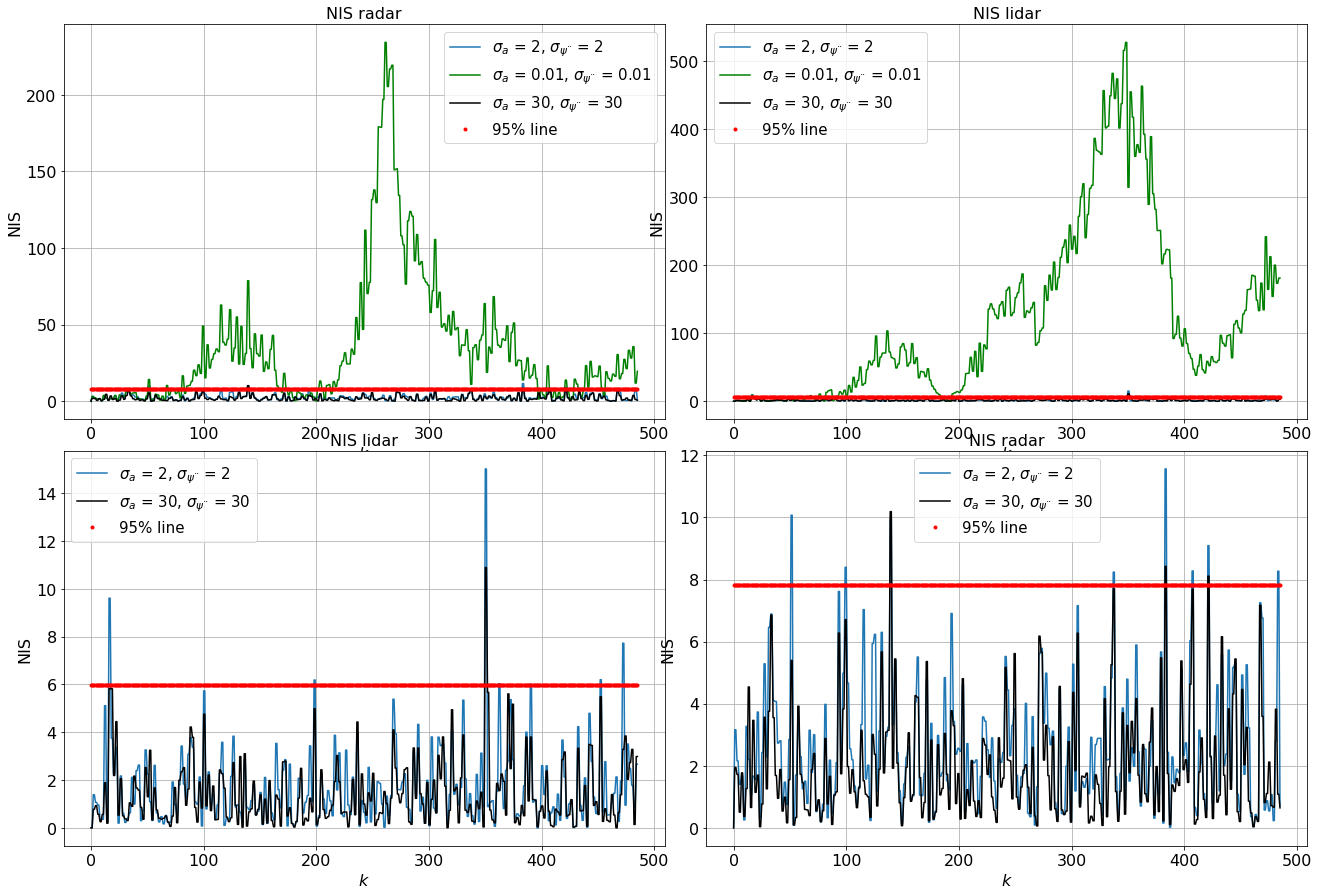

In [55]:
ukf_data_0 = pd.read_csv('CarND-Unscented-Kalman-Filter-Project/results/ukf_results_0.csv')
ukf_data_5 = pd.read_csv('CarND-Unscented-Kalman-Filter-Project/results/ukf_results_5.csv')
ukf_data_6 = pd.read_csv('CarND-Unscented-Kalman-Filter-Project/results/ukf_results_6.csv')

plt.figure()
f, ((ax2, ax3), (ax4, ax5)) = plt.subplots(2, 2, figsize=(18, 12))
f.tight_layout()
fsize = 16

ax2.plot(ukf_data_0.nis_radar, label = '$σ_{a}$ = 2, $σ_{ψ¨}$ = 2')
ax2.plot(ukf_data_5.nis_radar, 'g', label = '$σ_{a}$ = 0.01, $σ_{ψ¨}$ = 0.01')
ax2.plot(ukf_data_6.nis_radar, 'k', label = '$σ_{a}$ = 30, $σ_{ψ¨}$ = 30')
ax2.plot(np.repeat(7.815, len(ukf_data.nis_radar)), 'r.', label = '95% line')
ax2.set_title('NIS radar', fontsize = fsize)
ax2.set_ylabel('NIS', fontsize = fsize)
ax2.set_xlabel('$k$', fontsize = fsize)
ax2.tick_params(labelsize = fsize)
ax2.grid()
ax2.legend(fontsize = 15)

ax4.plot(ukf_data_0.nis_lidar, label = '$σ_{a}$ = 2, $σ_{ψ¨}$ = 2')
ax4.plot(ukf_data_6.nis_lidar, 'k', label = '$σ_{a}$ = 30, $σ_{ψ¨}$ = 30')
ax4.plot(np.repeat(5.99, len(ukf_data.nis_lidar)), 'r.', label = '95% line')
ax4.set_title('NIS lidar', fontsize = fsize)
ax4.set_ylabel('NIS', fontsize = fsize)
ax4.set_xlabel('$k$', fontsize = fsize)
ax4.tick_params(labelsize = fsize)
ax4.grid()
ax4.legend(fontsize = 15)

ax5.plot(ukf_data_0.nis_radar, label = '$σ_{a}$ = 2, $σ_{ψ¨}$ = 2')
ax5.plot(ukf_data_6.nis_radar, 'k', label = '$σ_{a}$ = 30, $σ_{ψ¨}$ = 30')
ax5.plot(np.repeat(7.815, len(ukf_data.nis_radar)), 'r.', label = '95% line')
ax5.set_title('NIS radar', fontsize = fsize)
ax5.set_ylabel('NIS', fontsize = fsize)
ax5.set_xlabel('$k$', fontsize = fsize)
ax5.tick_params(labelsize = fsize)
ax5.grid()
ax5.legend(fontsize = 15)

ax3.plot(ukf_data_0.nis_lidar, label = '$σ_{a}$ = 2, $σ_{ψ¨}$ = 2')
ax3.plot(ukf_data_5.nis_lidar, 'g', label = '$σ_{a}$ = 0.01, $σ_{ψ¨}$ = 0.01')
ax3.plot(ukf_data_6.nis_lidar, 'k', label = '$σ_{a}$ = 30, $σ_{ψ¨}$ = 30')
ax3.plot(np.repeat(5.99, len(ukf_data.nis_lidar)), 'r.', label = '95% line')
ax3.set_title('NIS lidar', fontsize = fsize)
ax3.set_ylabel('NIS', fontsize = fsize)
ax3.set_xlabel('$k$', fontsize = fsize)
ax3.tick_params(labelsize = fsize)
ax3.grid()
ax3.legend(fontsize = 15)
    
    
plt.savefig('NIS_performance.png', bbox_inches='tight', orientation='landscape', dpi=300)         

<Figure size 432x288 with 0 Axes>

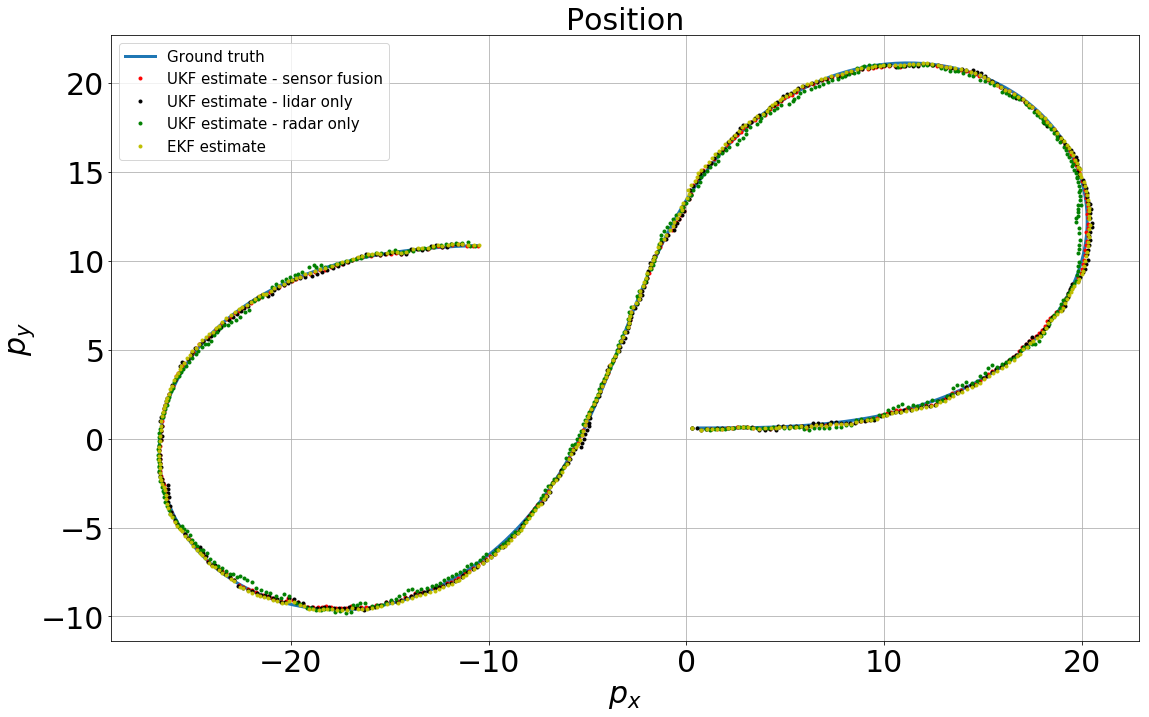

In [58]:
ukf_data_fusion = pd.read_csv('CarND-Unscented-Kalman-Filter-Project/results/ukf_results_0.csv')
ukf_data_lidar = pd.read_csv('CarND-Unscented-Kalman-Filter-Project/results/ukf_results_0_lidar.csv')
ukf_data_radar = pd.read_csv('CarND-Unscented-Kalman-Filter-Project/results/ukf_results_0_radar.csv')
ekf_data = pd.read_csv('CarND-Unscented-Kalman-Filter-Project/results/ekf_results_0.csv')

plt.figure()
f, ax1 = plt.subplots(1, 1, figsize=(15, 9))
f.tight_layout()
fsize = 30

ax1.plot(ukf_data_fusion.px_t, ukf_data_fusion.py_t, linewidth = 3, label = 'Ground truth')
ax1.plot(ukf_data_fusion.px_e, ukf_data_fusion.py_e, 'r.', label = 'UKF estimate - sensor fusion')
ax1.plot(ukf_data_lidar.px_e, ukf_data_lidar.py_e, 'k.', label = 'UKF estimate - lidar only')
ax1.plot(ukf_data_radar.px_e, ukf_data_radar.py_e, 'g.', label = 'UKF estimate - radar only')
ax1.plot(ekf_data.px_e, ekf_data.py_e, 'y.', label = 'EKF estimate')
ax1.set_title('Position', fontsize = fsize)
ax1.set_ylabel('$p_{y}$', fontsize = fsize)
ax1.set_xlabel('$p_{x}$', fontsize = fsize)
ax1.tick_params(labelsize = fsize)
ax1.grid()
ax1.legend(fontsize = 15)
plt.savefig('Sensor_fusion.png', bbox_inches='tight', orientation='landscape', dpi=300)

